In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv('titanic.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df.shape

(891, 12)

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Age and Fare must be having outliers due to high standard deviation and large difference between 75th percentile and maximum.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
This shows that Cabin has large number of missing values which cannot be filled using any method.

In [7]:
df1=df.drop(['Name','Ticket','Cabin','PassengerId'],axis=1)
df1.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [9]:
df1['Age'].fillna(df1['Age'].median(), inplace=True)

In [10]:
df1['Embarked'].fillna(df1['Embarked'].mode(), inplace=True)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [12]:
df1["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [13]:
#as the fillna operation is not working in the 'Embarked' column so I will simply replace the null value with 'S' as it is the most frequent value(plz comment why the fillna operation didn't work)
df1['Embarked'].replace(np.NaN,'S', inplace=True)

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [15]:
df1['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

<function matplotlib.pyplot.show(*args, **kw)>

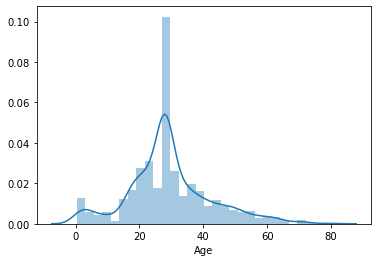

In [16]:
sn.distplot(df1['Age'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

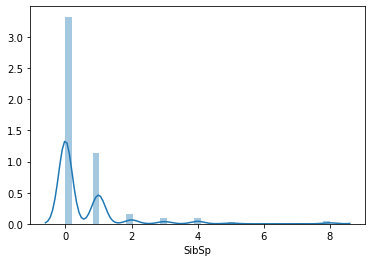

In [17]:
sn.distplot(df1['SibSp'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

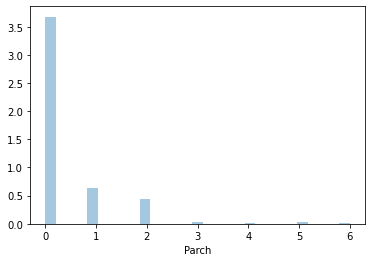

In [18]:
sn.distplot(df1['Parch'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

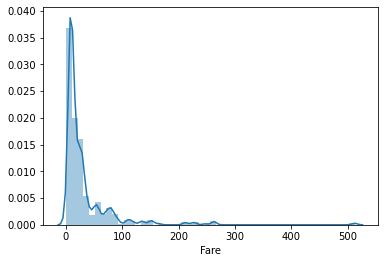

In [19]:
sn.distplot(df1['Fare'])
plt.show

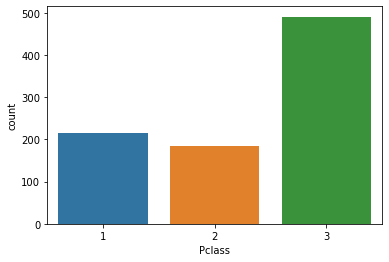

In [20]:
sn.countplot(df1['Pclass'])
plt.show()

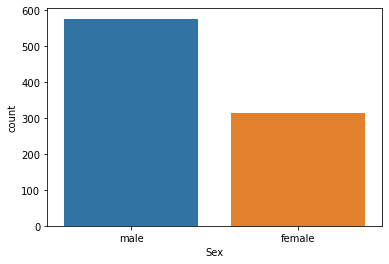

In [21]:
sn.countplot(df1['Sex'])
plt.show()

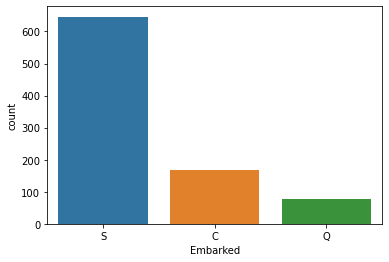

In [22]:
sn.countplot(df1['Embarked'])
plt.show()

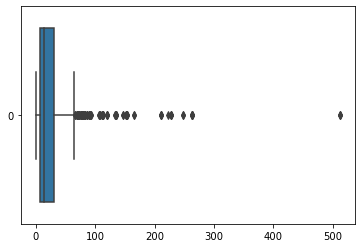

In [23]:
sn.boxplot(data=df1['Fare'], orient='h')
plt.show()

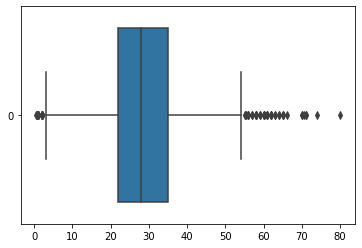

In [24]:
sn.boxplot(data=df1['Age'], orient='h')
plt.show()

In [25]:
df1.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.510245
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

In [26]:
from scipy.stats import zscore
z=np.abs(zscore(df1['Fare']))
z

array([5.02445171e-01, 7.86845294e-01, 4.88854258e-01, 4.20730236e-01,
       4.86337422e-01, 4.78116429e-01, 3.95813561e-01, 2.24083121e-01,
       4.24256141e-01, 4.29555021e-02, 3.12172378e-01, 1.13845709e-01,
       4.86337422e-01, 1.87093118e-02, 4.90279793e-01, 3.26266659e-01,
       6.19988892e-02, 3.86670720e-01, 2.85997284e-01, 5.02948539e-01,
       1.24919787e-01, 3.86670720e-01, 4.86756223e-01, 6.63597416e-02,
       2.24083121e-01, 1.64441595e-02, 5.02948539e-01, 4.64700108e+00,
       4.89776426e-01, 4.89442190e-01, 9.02720170e-02, 2.30172882e+00,
       4.92377828e-01, 4.37007438e-01, 1.00606170e+00, 3.98582080e-01,
       5.02863973e-01, 4.86337422e-01, 2.85997284e-01, 4.22073541e-01,
       4.57645492e-01, 2.25593223e-01, 4.89442190e-01, 1.88762532e-01,
       4.89776426e-01, 4.86337422e-01, 3.36334002e-01, 4.92377828e-01,
       2.11917743e-01, 2.90024222e-01, 1.50673744e-01, 4.91371093e-01,
       8.96496787e-01, 1.24919787e-01, 5.99510151e-01, 6.63597416e-02,
      

In [27]:
threshold=3
a=np.array(np.where(z>3))
a

array([[ 27,  88, 118, 258, 299, 311, 341, 377, 380, 438, 527, 557, 679,
        689, 700, 716, 730, 737, 742, 779]], dtype=int64)

In [28]:
a.shape

(1, 20)

In [29]:
a=a.ravel() #converting to one-dimension

In [30]:
a.shape

(20,)

In [31]:
a.ndim

1

In [32]:
df2=df1.drop(a)

In [33]:
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le=LabelEncoder()
df2['Sex']=le.fit_transform(df2['Sex'])
df2['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 871, dtype: int32

In [36]:
l=LabelEncoder()
df2['Embarked']=l.fit_transform(df2['Embarked'])
df2['Embarked']

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 871, dtype: int32

In [37]:
df2['Embarked'].unique()

array([2, 0, 1])

In [38]:
df2.skew()

Survived    0.510329
Pclass     -0.696979
Sex        -0.645209
Age         0.502364
SibSp       3.764629
Parch       2.849149
Fare        2.250999
Embarked   -1.320908
dtype: float64

In [39]:
from scipy.stats import boxcox
df2['Fare']=boxcox(df2['Fare'], 0)

ValueError: Data must be positive.

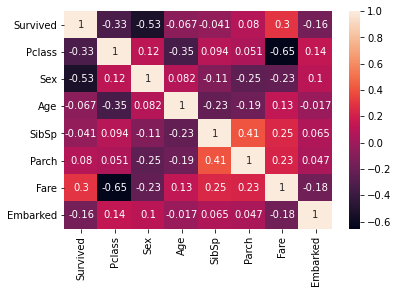

In [40]:
corr=df2.corr()
sn.heatmap(corr,annot=True)
plt.show()

As 'Age', 'SibSp', 'Parch' have very low correlation with the target variable so I will be dropping them.

In [120]:
df3=df2.drop(['SibSp','Parch','Age'],axis=1)
df3.head(10)

,Survived,Pclass,Sex,Fare,Embarked
0,0,3,1,7.2500,2
1,1,1,0,71.2833,0
2,1,3,0,7.9250,2
3,1,1,0,53.1000,2
4,0,3,1,8.0500,2
5,0,3,1,8.4583,1
6,0,1,1,51.8625,2
7,0,3,1,21.0750,2
8,1,3,0,11.1333,2
9,1,2,0,30.0708,0


In [121]:
x=df3.drop('Survived',axis=1)
y=df3['Survived']
print(x)
print(y)

     Pclass  Sex     Fare  Embarked
0         3    1   7.2500         2
1         1    0  71.2833         0
2         3    0   7.9250         2
3         1    0  53.1000         2
4         3    1   8.0500         2
..      ...  ...      ...       ...
886       2    1  13.0000         2
887       1    0  30.0000         2
888       3    0  23.4500         2
889       1    1  30.0000         0
890       3    1   7.7500         1

[871 rows x 4 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 871, dtype: int64


In [122]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
#please tell which method can be used to remove skewness from a particular column when boxcox and np.log do not work

In [123]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sx=sc.fit_transform(x)

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [125]:
best_rstate=0
accu=0
for i in range(30,200):
    train_x,test_x,train_y,test_y=train_test_split(sx,y,test_size=0.25,random_state=i)
    lg=LogisticRegression()
    lg.fit(train_x,train_y)
    pred=lg.predict(test_x)
    temp_acc=accuracy_score(test_y,pred)
    if temp_acc>accu:
        accu=temp_acc
        best_rstate=i

print(f'Best accuracy {accu*100} found on random_state {best_rstate}')

Best accuracy 84.40366972477065 found on random_state 68


In [126]:
train_x,test_x,train_y,test_y=train_test_split(sx,y,test_size=0.25,random_state=68)
lg=LogisticRegression()
lg.fit(train_x,train_y)
pred=lg.predict(test_x)
print(accuracy_score(test_y,pred))

0.8440366972477065


In [127]:
print(confusion_matrix(test_y,pred))

[[128  18]
 [ 16  56]]


In [128]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       146
           1       0.76      0.78      0.77        72

    accuracy                           0.84       218
   macro avg       0.82      0.83      0.82       218
weighted avg       0.85      0.84      0.84       218



In [129]:
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [130]:
gb=GaussianNB()
gb.fit(train_x,train_y)
predgb=gb.predict(test_x)
print(accuracy_score(test_y,predgb))
print(confusion_matrix(test_y,predgb))
print(classification_report(test_y,predgb))

0.8348623853211009
[[123  23]
 [ 13  59]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       146
           1       0.72      0.82      0.77        72

    accuracy                           0.83       218
   macro avg       0.81      0.83      0.82       218
weighted avg       0.84      0.83      0.84       218



In [131]:
svc=SVC()
svc.fit(train_x,train_y)
predsvc=svc.predict(test_x)
print(accuracy_score(test_y,predsvc))
print(confusion_matrix(test_y,predsvc))
print(classification_report(test_y,predsvc))

0.8761467889908257
[[140   6]
 [ 21  51]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       146
           1       0.89      0.71      0.79        72

    accuracy                           0.88       218
   macro avg       0.88      0.83      0.85       218
weighted avg       0.88      0.88      0.87       218



In [132]:
dtc=DecisionTreeClassifier()
dtc.fit(train_x,train_y)
preddtc=dtc.predict(test_x)
print(accuracy_score(test_y,preddtc))
print(confusion_matrix(test_y,preddtc))
print(classification_report(test_y,preddtc))

0.8623853211009175
[[127  19]
 [ 11  61]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       146
           1       0.76      0.85      0.80        72

    accuracy                           0.86       218
   macro avg       0.84      0.86      0.85       218
weighted avg       0.87      0.86      0.86       218



In [133]:
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(train_x,train_y)
preddtc=dtc.predict(test_x)
print(accuracy_score(test_y,preddtc))
print(confusion_matrix(test_y,preddtc))
print(classification_report(test_y,preddtc))

0.8623853211009175
[[128  18]
 [ 12  60]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       146
           1       0.77      0.83      0.80        72

    accuracy                           0.86       218
   macro avg       0.84      0.86      0.85       218
weighted avg       0.87      0.86      0.86       218



In [134]:
svc=SVC(kernel='poly')
svc.fit(train_x,train_y)
predsvc=svc.predict(test_x)
print(accuracy_score(test_y,predsvc))
print(confusion_matrix(test_y,predsvc))
print(classification_report(test_y,predsvc))

0.8761467889908257
[[140   6]
 [ 21  51]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       146
           1       0.89      0.71      0.79        72

    accuracy                           0.88       218
   macro avg       0.88      0.83      0.85       218
weighted avg       0.88      0.88      0.87       218



In [135]:
svc=SVC(kernel='linear')
svc.fit(train_x,train_y)
predsvc=svc.predict(test_x)
print(accuracy_score(test_y,predsvc))
print(confusion_matrix(test_y,predsvc))
print(classification_report(test_y,predsvc))

0.8532110091743119
[[130  16]
 [ 16  56]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       146
           1       0.78      0.78      0.78        72

    accuracy                           0.85       218
   macro avg       0.83      0.83      0.83       218
weighted avg       0.85      0.85      0.85       218



In [136]:
#Hypertuning
parameters={'C':[0.1,1,10],
            'gamma':[0.1,1,10]}

In [137]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
GCV=GridSearchCV(SVC(),parameters,cv=5,scoring='f1')
GCV.fit(train_x,train_y)
GCV.best_estimator_
GCV_pred=GCV.best_estimator_.predict(test_x)
print('Final accuracy:', f1_score(test_y,GCV_pred)*100)

Final accuracy: 80.26315789473685


In [ ]:
#the accuracy of the model reduced after hypertuning. So which model should be choosed ultimately?